In [19]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


In [20]:
df=pd.read_csv('credit_card_churn - credit_card_churn.csv.csv')

In [21]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [23]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(10127, 21)

In [26]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [27]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [28]:
numerical_columns=df.select_dtypes('float')

In [29]:
numerical_columns.shape

(10127, 10)

In [30]:
categorical_columns=df.select_dtypes('object','category')

In [31]:
categorical_columns.shape

(10127, 6)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [34]:
print(numerical_columns.columns)

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')


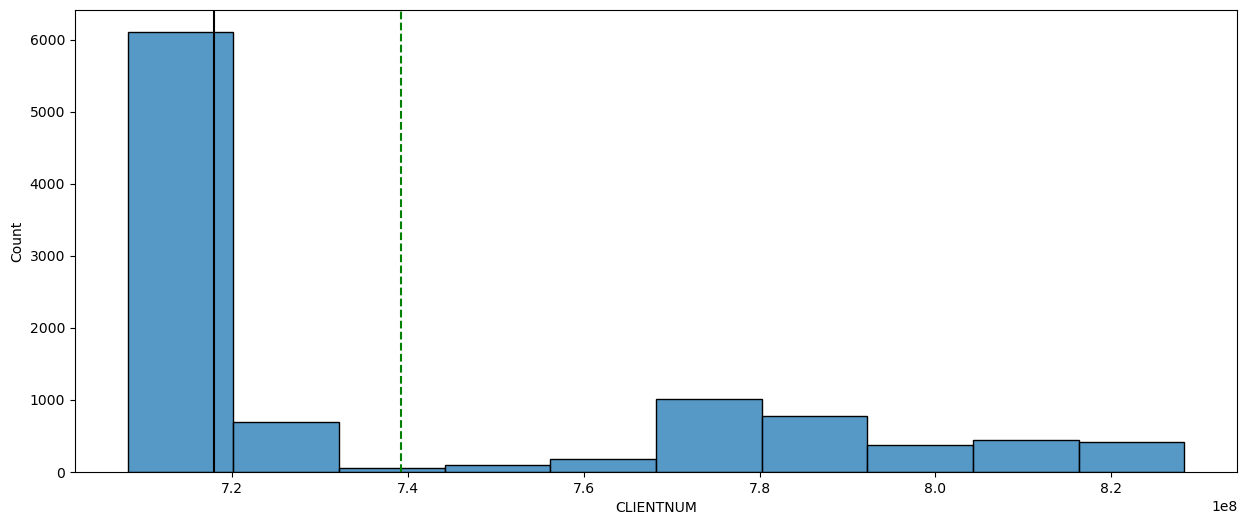

In [41]:
def distribution_function(df,feature,figsize=(15,6),bins=10,kde=False):
    f,ax_hist=plt.subplots(nrows=1,figsize=figsize)
    sns.histplot(data=df,x=feature,kde=kde,ax=ax_hist,bins=bins)
    ax_hist.axvline(df[feature].mean(),color='green',linestyle='--')
    ax_hist.axvline(df[feature].median(),color='black',linestyle='-')
    
distribution_function(df,'CLIENTNUM')

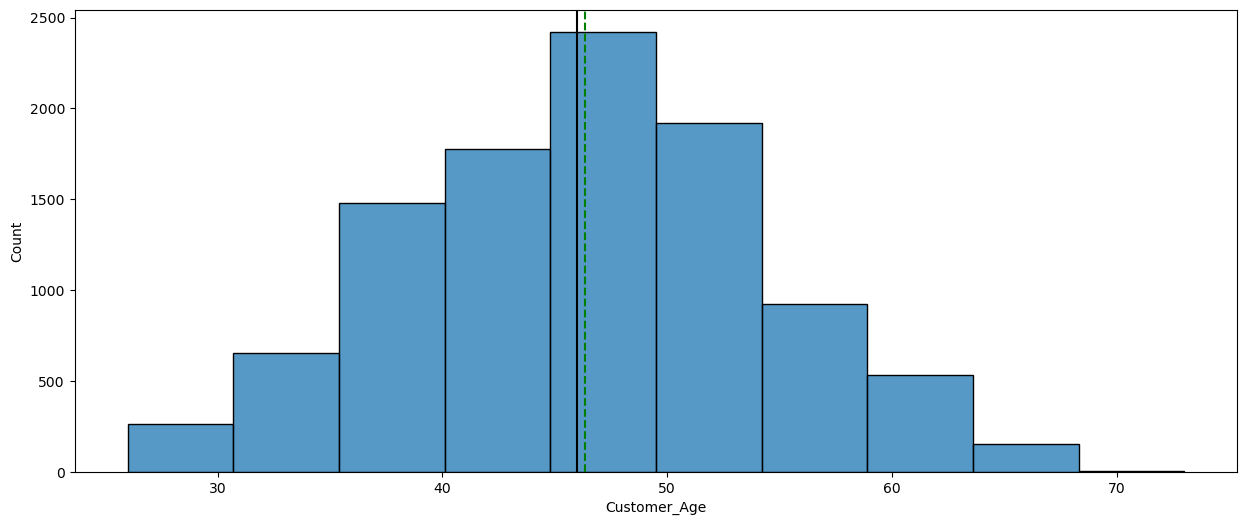

In [42]:
distribution_function(df,'Customer_Age')

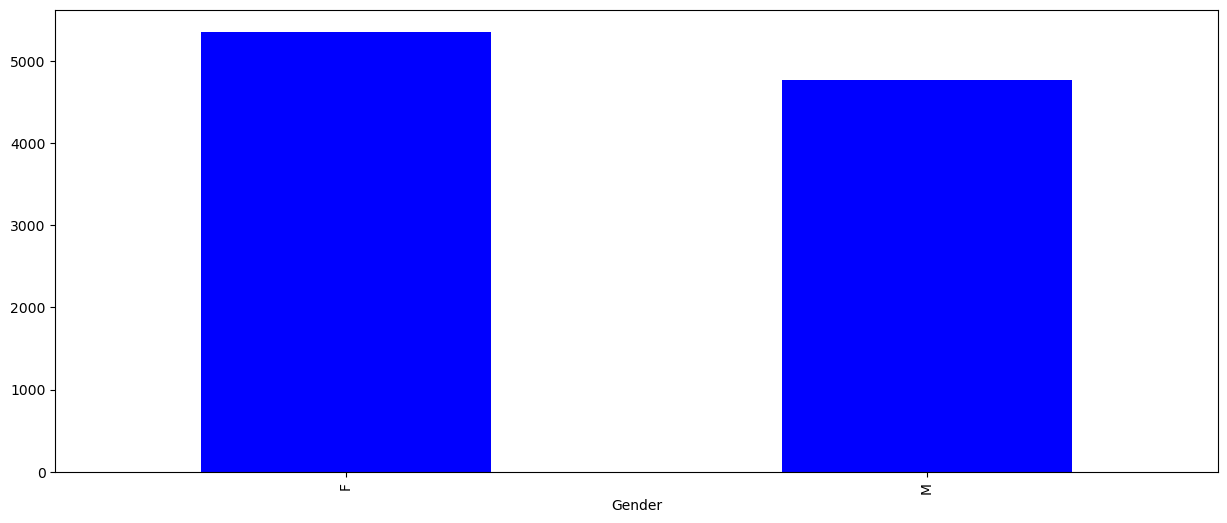

In [52]:
def univariate_analysis(df,column):
    plt.figure(figsize=(15,6))
    df[column].value_counts().plot(kind='bar',color='blue')
    plt.show()
    
univariate_analysis(df,'Gender')

In [43]:
categorical_columns.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [59]:
def percentage_distribution(df,column):
    print(df[column].value_counts(normalize=True)*100)
  

In [61]:
percentage_distribution(df,'Gender')

Gender
F    52.908068
M    47.091932
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

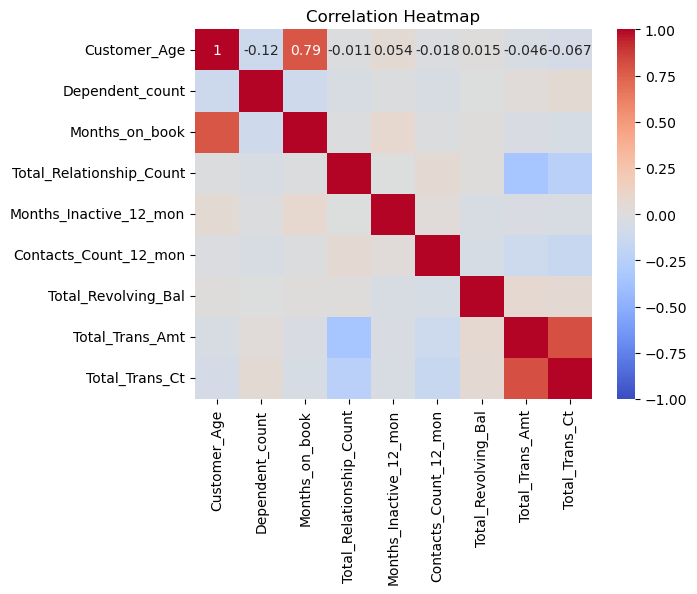

In [79]:
correlaiton_metrics=numerical_columns.corr()
sns.heatmap(correlaiton_metrics,annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.title('Correlation Heatmap')


In [73]:
numerical_columns.drop('CLIENTNUM',axis=1,inplace=True)

In [80]:
categorical_columns.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

<Axes: xlabel='Attrition_Flag'>

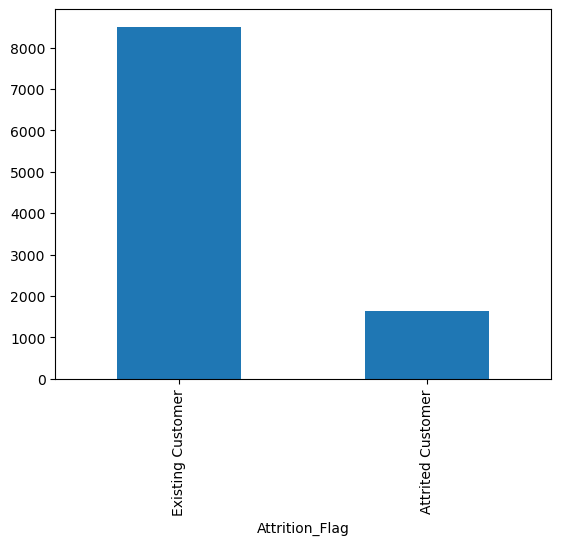

In [87]:
df['Attrition_Flag'].value_counts().plot(kind='bar')

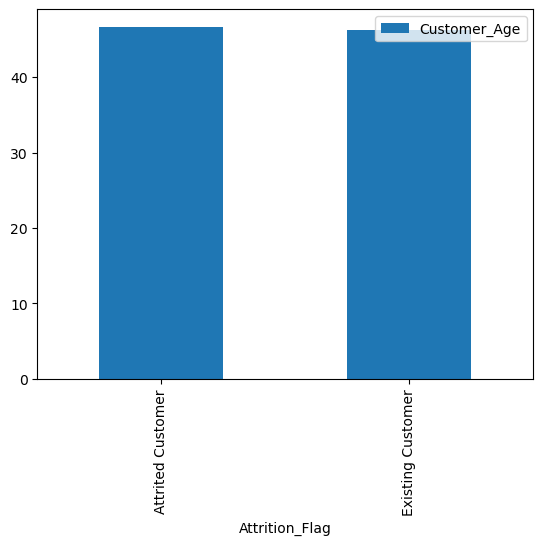

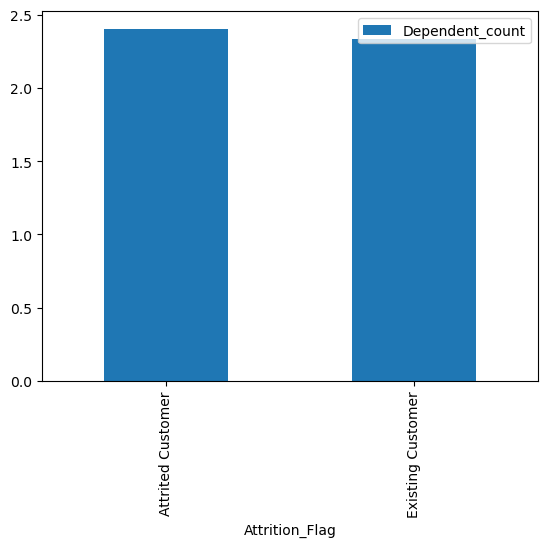

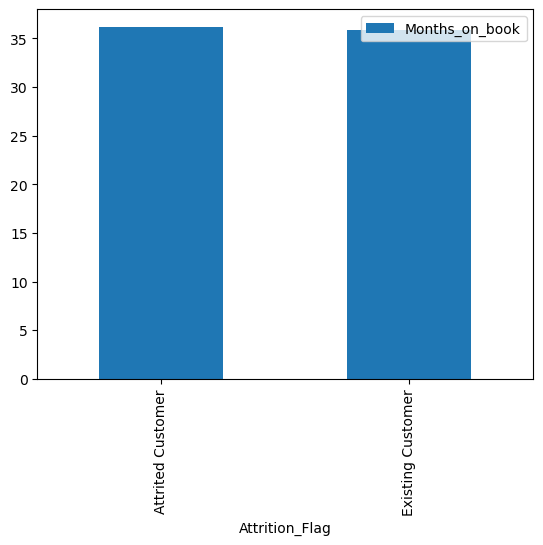

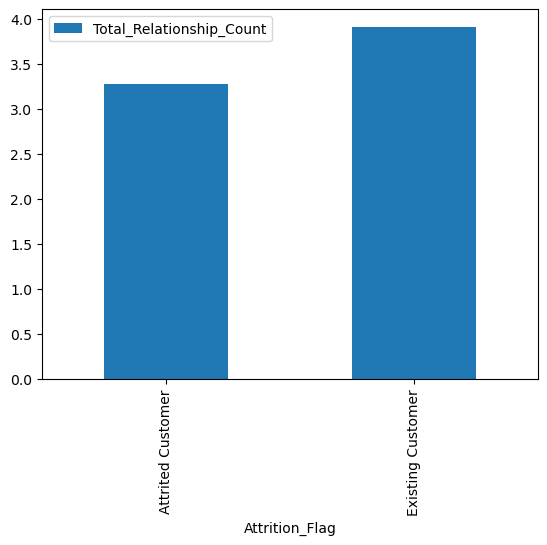

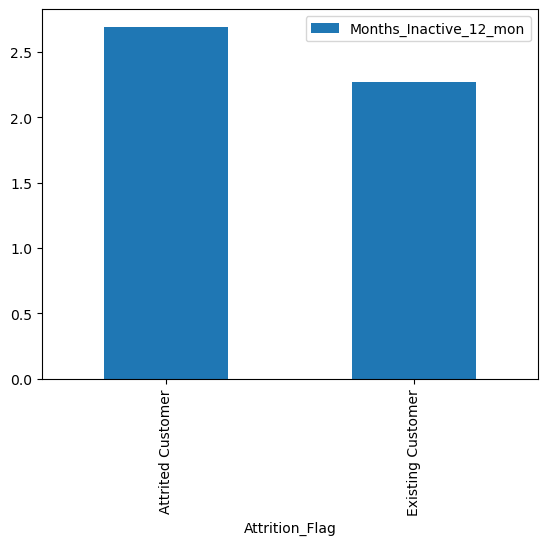

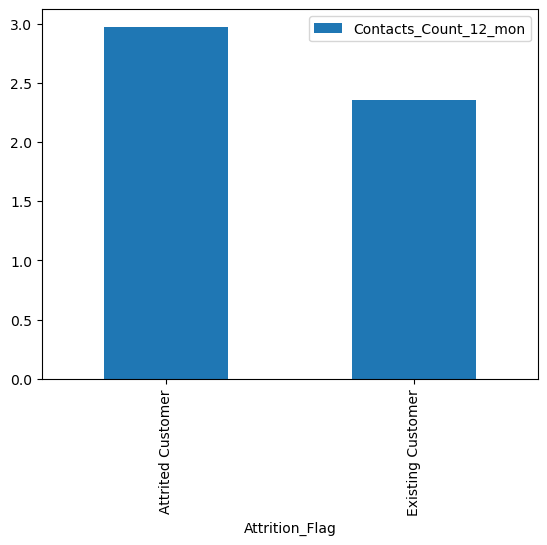

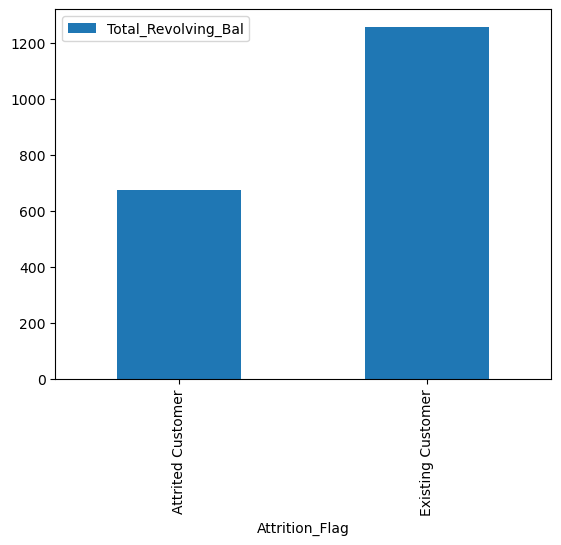

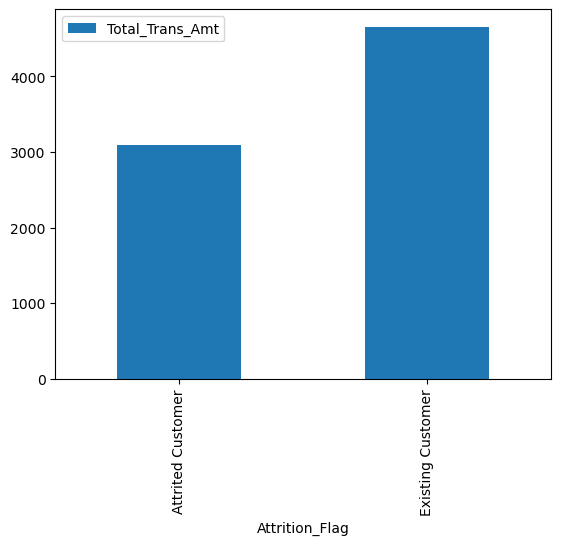

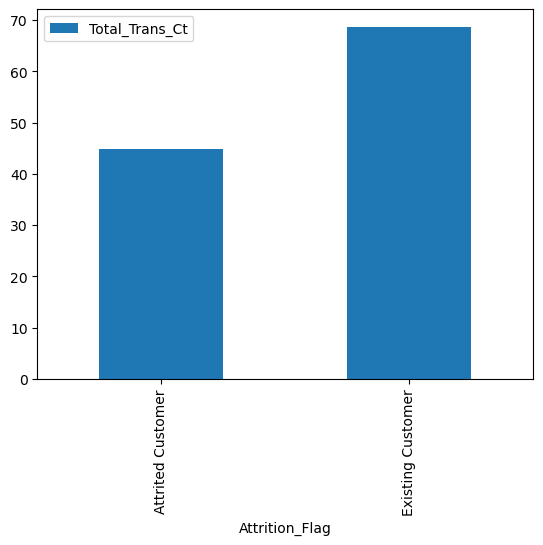

In [94]:
for c in numerical_columns:
    df.pivot_table(index='Attrition_Flag',values=c,aggfunc='mean').plot(kind='bar')

<Figure size 1500x600 with 0 Axes>

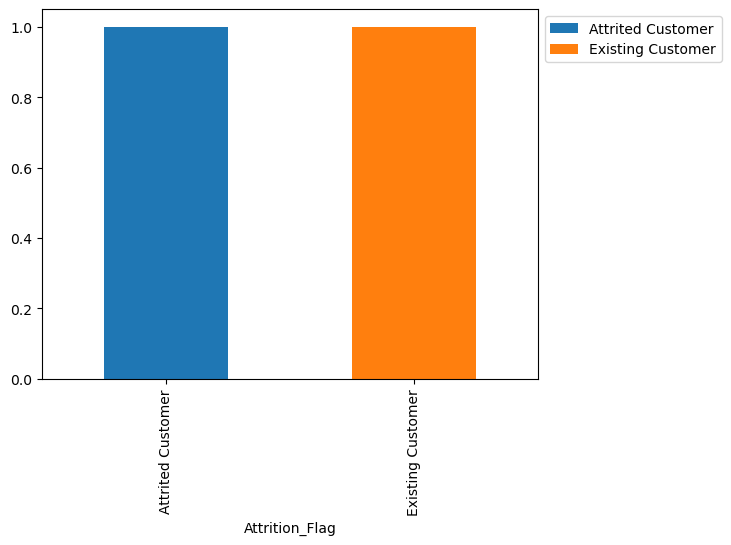

<Figure size 1500x600 with 0 Axes>

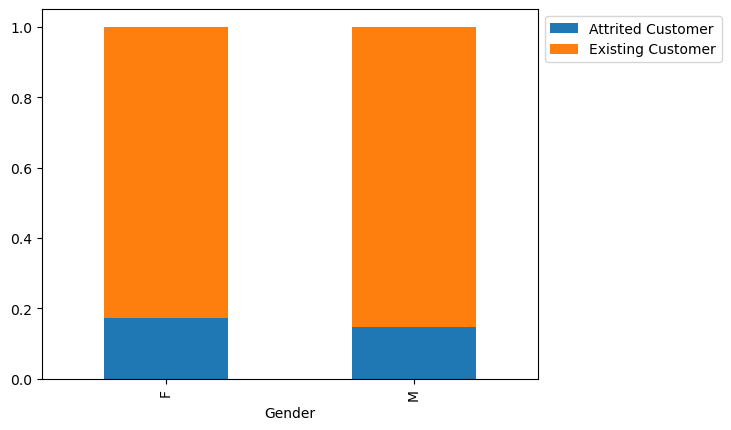

<Figure size 1500x600 with 0 Axes>

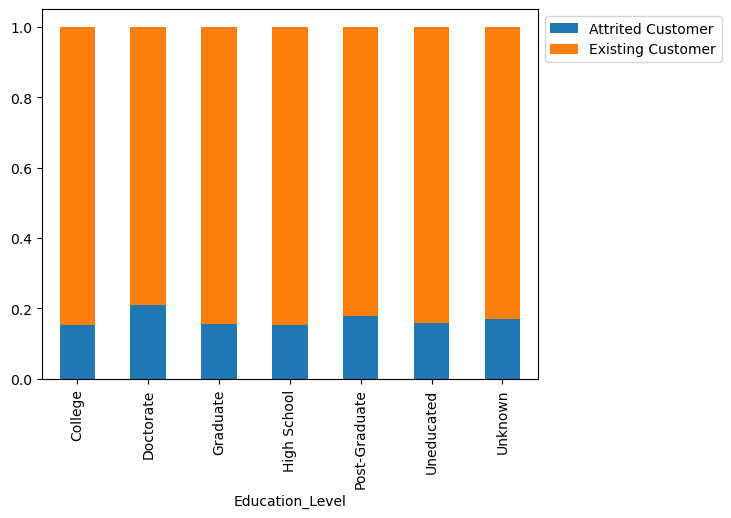

<Figure size 1500x600 with 0 Axes>

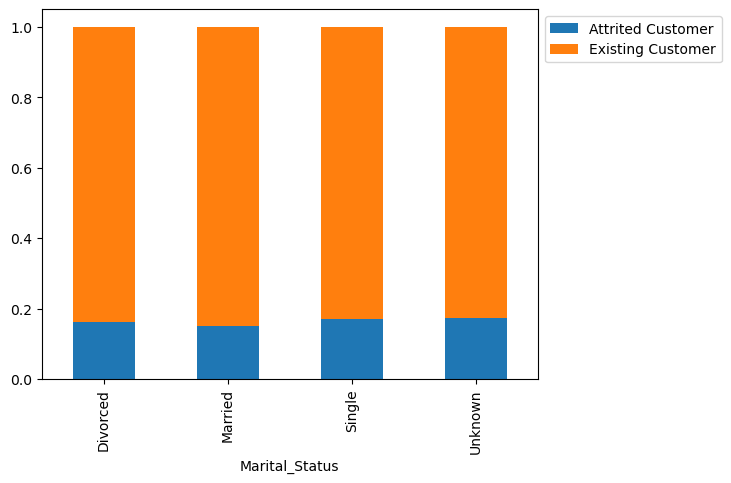

<Figure size 1500x600 with 0 Axes>

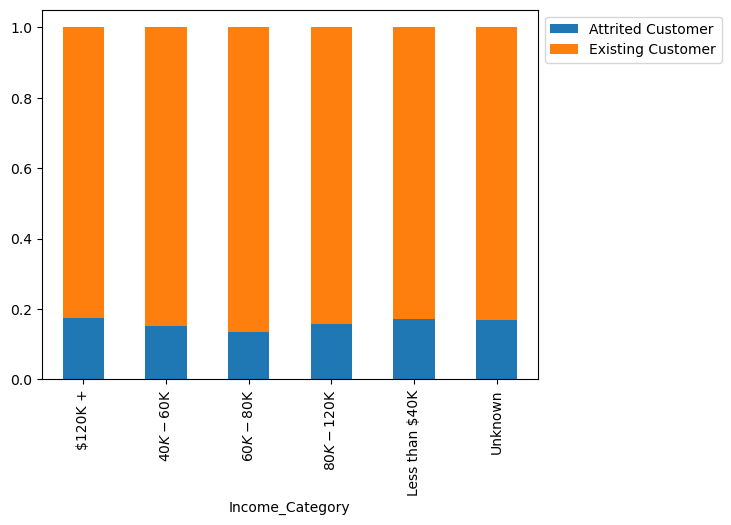

<Figure size 1500x600 with 0 Axes>

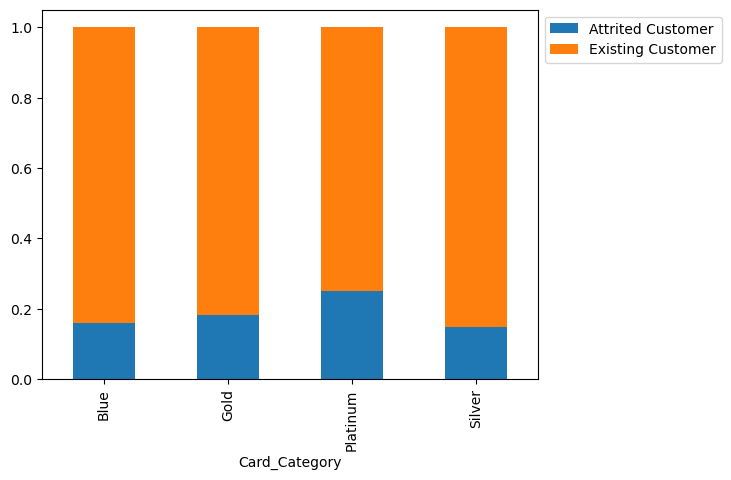

In [104]:
for a in categorical_columns:
    d=pd.crosstab(df[a],df['Attrition_Flag'],normalize='index')
    plt.figure(figsize=(15,6))
    d.plot(kind='bar',stacked=True)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

In [105]:
df.drop(['CLIENTNUM' , 'Avg_Open_To_Buy', 'Months_on_book' , 'Marital_Status'],axis=1,inplace=True)

In [106]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [107]:
df.shape

(10127, 17)

In [108]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [113]:
df.Attrition_Flag=df.Attrition_Flag.apply(lambda x:0 if x=='Existing Customer' else 1)

In [114]:
df.Attrition_Flag.value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [115]:
df.Education_Level.value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [116]:
df.Education_Level=df.Education_Level.apply(lambda x:'higher_education' if x in['Post-Graduate','Doctorate'] else 'lower_education')

In [117]:
df.Education_Level.value_counts()

Education_Level
lower_education     9160
higher_education     967
Name: count, dtype: int64